In [1]:
from smach_utils2 import *
import matplotlib.pyplot as plt
#arm = moveit_commander.MoveGroupCommander('arm')


/home/roboworks/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


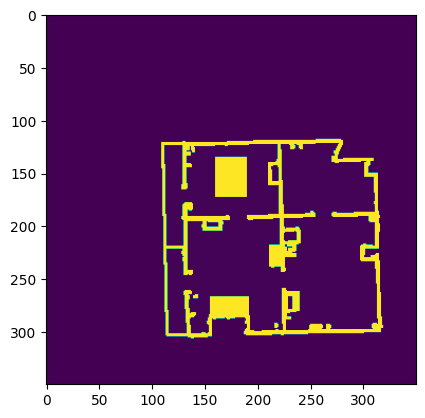

In [2]:
zoom_y,zoom_x=850,900


plt.imshow(img_map[zoom_y:zoom_y+350,zoom_x:zoom_x+350])


In [3]:
import pandas as pd
objs = pd.read_csv ('/home/roboworks/Documents/objs.csv')
objs=objs.drop(columns='Unnamed: 0')
objs

,x,y,z,obj_name
0,6.227882,4.666946,0.421180,bowl
1,6.616479,4.718929,0.350914,spatula
2,6.415558,4.598716,0.442853,f_cups
3,5.987888,4.727926,0.484373,cracker_box
4,6.346741,4.556713,0.293274,b_colored_wood_blocks
5,7.960607,6.162414,0.069649,a_pitcher_base
6,6.425257,4.599954,0.441459,a_pitcher_base
7,8.431932,5.926479,0.380982,h_cups
8,8.469898,5.945636,0.380248,softball
9,8.471974,5.948203,0.379679,baseball


In [4]:
def convert_image(image):
    if image.dtype != np.uint8:
        # Assuming the image pixel values are normalized between 0 and 1
        image = (image * 255).astype(np.uint8)
    return image

In [5]:
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(f'Mouse Click at: x = {x}, y = {y}')

In [12]:
def draw_rectangle(event, x, y, flags, param):
    global ix, iy, drawing, mode ,xx , yy

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            img_copy = convert_image(img_map[850:1200,900:1250]).copy()  # Make a copy to keep the original image intact
            cv2.rectangle(img_copy, (ix, iy), (x, y), (255, 255, 255), 3)
            cv2.imshow('image', img_copy)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        iimg=cv2.rectangle(convert_image(img_map[850:1200,900:1250]), (ix, iy), (x, y), (255, 255, 255), -1)
        xx,yy=x,y
        print ((ix,iy,x,y))
        cv2.imshow('image', convert_image(img_map[850:1200,900:1250]))
        cv2.imshow('Region', iimg)



In [21]:
cv2.namedWindow('image')
#cv2.setMouseCallback('image', click_event)
cv2.setMouseCallback('image', draw_rectangle)
# Initialize variables for mouse event handling
drawing = False
ix, iy = -1, -1
while True:
    cv2.imshow('image', convert_image(img_map[850:1200,900:1250]))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()


(200, 246, 280, 342)


In [22]:
origin_map_img=[round(img_map.shape[0]*0.5) ,round(img_map.shape[1]*0.5)]   
#Draw Origin
img_map[origin_map_img[0]:origin_map_img[0]+10,origin_map_img[1]:origin_map_img[1]+10]=128
img_map[zoom_y+iy:zoom_y+yy,zoom_x+ix:zoom_x+xx]=255
area_box=[]
pix_y=zoom_y+iy
pix_x=zoom_x+ix
xy_map=((pix_x- origin_map_img[1])*pix_per_m,(pix_y-1024)*pix_per_m)
area_box.append(xy_map)
pix_y,pix_x=zoom_y+yy,zoom_x+xx
xy_map=((pix_x- origin_map_img[1])*pix_per_m,(pix_y-1024)*pix_per_m)
area_box.append(xy_map)
area_box=np.asarray(area_box)
pickup_region=area_box
area_box

array([[3.80000006, 3.60000005],
       [7.80000012, 8.40000013]])

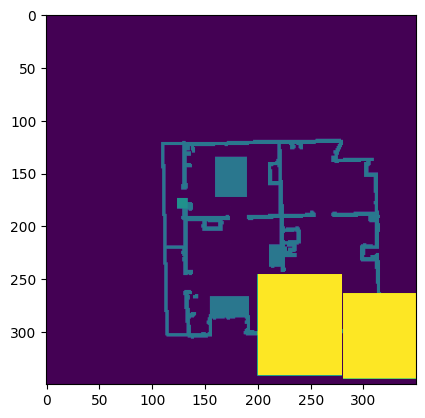

In [23]:

plt.imshow(img_map[850:1200,900:1250])

In [ ]:
#area_box=shelves_region


In [31]:
area_box=np.load('/home/roboworks/Documents/shelves_region.npy')
area_box

array([[ 7.85000012,  4.50000007],
       [11.35000017,  8.55000013]])

In [ ]:
area_box=np.load('/home/roboworks/Documents/pickup_region.npy')
area_box

In [44]:
area_box=regions[name]
print (area_box)
for index, row in objs[['x','y']].iterrows():in_region.append(is_inside(row.x, row.y))

    #objs[name]=pd.Series(in_region)

(array([[3.80000006, 3.60000005],
        [7.80000012, 8.40000013]]),
 'pickup')

In [45]:
regions={'shelves':np.load('/home/roboworks/Documents/shelves_region.npy'),'pickup':np.load('/home/roboworks/Documents/pickup_region.npy')}
def is_inside(x,y):return ((area_box[1,1] > y) and (area_box[0,1] < y)) and ((area_box[1,0] > x) and (area_box[0,0] < x)) 
for name in regions:
    in_region=[]
    area_box=regions[name]
    print (area_box)
    for index, row in objs[['x','y']].iterrows():in_region.append(is_inside(row.x, row.y))
    objs[name]=pd.Series(in_region)
objs

[[ 7.85000012  4.50000007]
 [11.35000017  8.55000013]]
[[3.80000006 3.60000005]
 [7.80000012 8.40000013]]


,x,y,z,obj_name,shelves,pickup
0,6.227882,4.666946,0.421180,bowl,False,True
1,6.616479,4.718929,0.350914,spatula,False,True
2,6.415558,4.598716,0.442853,f_cups,False,True
3,5.987888,4.727926,0.484373,cracker_box,False,True
4,6.346741,4.556713,0.293274,b_colored_wood_blocks,False,True
5,7.960607,6.162414,0.069649,a_pitcher_base,True,False
6,6.425257,4.599954,0.441459,a_pitcher_base,False,True
7,8.431932,5.926479,0.380982,h_cups,True,False
8,8.469898,5.945636,0.380248,softball,True,False
9,8.471974,5.948203,0.379679,baseball,True,False


[ WARN] [1710114112.674322270]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 783.111000 according to authority /pose_integrator
[ WARN] [1710114112.674451694]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 783.111000 according to authority /pose_integrator
[ WARN] [1710114112.674505388]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 783.111000 according to authority /pose_integrator
[ WARN] [1710114112.674551072]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 783.111000 according to authority /pose_integrator
[ WARN] [1710114112.674599402]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 783.111000 according to authority /pose_integrator
[ WARN] [1710114112.674648249]: TF_REPEATED_DATA ignoring data with redundant timestamp for frame odom at time 783.111000 according to authority /pose_integrator


In [32]:
#area_box=np.load('/home/roboworks/Documents/pickup_region.npy')
#area_box=np.load('/home/roboworks/Documents/shelves_region.npy')
in_region=[]
name='shelves'
def is_inside(x,y):return ((area_box[1,1] > y) and (area_box[0,1] < y)) and ((area_box[1,0] > x) and (area_box[0,0] < x)) 
for index, row in objs[['x','y']].iterrows():in_region.append(is_inside(row.x, row.y))
objs[name]=pd.Series(in_region)


In [33]:
objs

,x,y,z,obj_name,shelves,pickup
0,6.227882,4.666946,0.421180,bowl,False,True
1,6.616479,4.718929,0.350914,spatula,False,True
2,6.415558,4.598716,0.442853,f_cups,False,True
3,5.987888,4.727926,0.484373,cracker_box,False,True
4,6.346741,4.556713,0.293274,b_colored_wood_blocks,False,True
5,7.960607,6.162414,0.069649,a_pitcher_base,True,False
6,6.425257,4.599954,0.441459,a_pitcher_base,False,True
7,8.431932,5.926479,0.380982,h_cups,True,False
8,8.469898,5.945636,0.380248,softball,True,False
9,8.471974,5.948203,0.379679,baseball,True,False


In [28]:
pickup_region=area_box

In [19]:
shelves_region=area_box

In [29]:
np.save('/home/roboworks/Documents/pickup_region.npy', pickup_region)

In [20]:
np.save('/home/roboworks/Documents/shelves_region.npy', shelves_region)

In [30]:
area_box

array([[3.80000006, 3.60000005],
       [7.80000012, 8.40000013]])